In [174]:
# import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

df_ratings = pd.read_csv("IMDB Movies India.csv", encoding="ISO-8859-1")

# # display shape of the dataset
print(df_ratings.shape)

# # display top 5 rows of the dataset to get an idea
print(df_ratings.head())

# print information about the dataset
print(df_ratings.info())

# print statistical description of the dataset
print(df_ratings.describe())

# #Checking the unique values in each column
# for col in df_ratings.select_dtypes(include = "object"):
#     print(f"The unique values in Column: {col}")
#     print(df_ratings[col].unique())
#Checking the values in each column
for col in df_ratings.select_dtypes(include = "object"):
    print(f"the values in Column: {col}")   
    print(df_ratings[col].value_counts(), "\n\n")


(15509, 10)
                                 Name    Year Duration            Genre  \
0                                         NaN      NaN            Drama   
1  #Gadhvi (He thought he was Gandhi)  (2019)  109 min            Drama   
2                         #Homecoming  (2021)   90 min   Drama, Musical   
3                             #Yaaram  (2019)  110 min  Comedy, Romance   
4                   ...And Once Again  (2010)  105 min            Drama   

   Rating Votes            Director       Actor 1             Actor 2  \
0     NaN   NaN       J.S. Randhawa      Manmauji              Birbal   
1     7.0     8       Gaurav Bakshi  Rasika Dugal      Vivek Ghamande   
2     NaN   NaN  Soumyajit Majumdar  Sayani Gupta   Plabita Borthakur   
3     4.4    35          Ovais Khan       Prateik          Ishita Raj   
4     NaN   NaN        Amol Palekar  Rajat Kapoor  Rituparna Sengupta   

           Actor 3  
0  Rajendra Bhatia  
1    Arvind Jangid  
2       Roy Angana  
3  Siddhant Ka

In [175]:
# print number of missing values in each column
print(df_ratings.isnull().sum())

# calculate the threshold for missing values
threshold_Na = len(df_ratings) * 0.05
print(f"threshold_Na: {threshold_Na}")

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64
threshold_Na: 775.45


<Axes: >

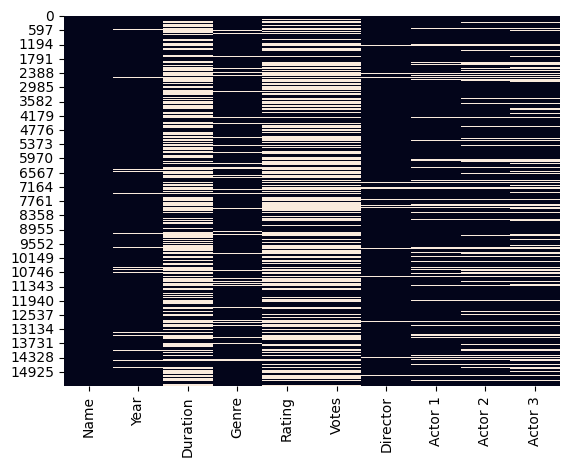

In [176]:
# visualize missing values in the dataset
sns.heatmap(df_ratings.isnull(), cbar=False)

In [177]:
# make a copy of the dataset
df_filtered = df_ratings.copy()

In [178]:
# Deal with the missing values
# Impute 'Director' and 'Actors' with placeholders
df_filtered.fillna({'Director': 'Unknown Director', 
                    'Actor 1': 'Unknown Actor', 
                    'Actor 2': 'Unknown Actor', 
                    'Actor 3': 'Unknown Actor'}, inplace=True)

# calculate the threshold for missing values
threshold_Na = len(df_ratings) * 0.05
print(f"threshold_Na: {threshold_Na}")

# Drop rows where missing values are in columns with less than or equal to threshold_Na missing values
for col in df_filtered.columns:
    if df_filtered[col].isnull().sum() <= threshold_Na:
        df_filtered.dropna(subset=[col], inplace=True)
        
print(df_filtered.isnull().sum())
print(df_filtered.info())


threshold_Na: 775.45
Name           0
Year           0
Duration    7866
Genre       1841
Rating      7062
Votes       7061
Director       0
Actor 1        0
Actor 2        0
Actor 3        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 14981 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      14981 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7115 non-null   object 
 3   Genre     13140 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14981 non-null  object 
 7   Actor 1   14981 non-null  object 
 8   Actor 2   14981 non-null  object 
 9   Actor 3   14981 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.3+ MB
None


In [179]:
# Cleaning the data and Handling missing values

# extract the year from the 'Year' column
df_filtered['Year'] = df_filtered['Year'].str.extract(r"(\d+)")

# convert the 'Year' column to integer
df_filtered['Year'] = df_filtered['Year'].astype('int64')

print(df_filtered['Year'].unique())
print(df_filtered['Year'].dtypes)

[2019 2021 2010 1997 2005 2008 2012 2014 2004 2016 1991 1990 2018 1987
 1948 1958 2017 2020 2009 2002 1993 1946 1994 2007 2013 2003 1998 1979
 1951 1956 1974 2015 2006 1981 1985 2011 2001 1967 1988 1995 1959 1996
 1970 1976 2000 1999 1973 1968 1943 1953 1986 1983 1989 1982 1977 1957
 1950 1992 1969 1975 1947 1972 1971 1935 1978 1960 1944 1963 1940 1984
 1934 1955 1936 1980 1966 1949 1962 1964 1952 1933 1942 1939 1954 1945
 1961 1965 1938 1941 1931 1937 2022 1932 1923 1915 1928 1922 1917 1913
 1930 1926 1914 1924]
int64


In [180]:
# extract the True letters(Text) from the "Name" column
df_filtered['Name'] = df_filtered['Name'].str.extract(r'([A-Za-z\s\'\-]+)')

# print to check the result
print(df_filtered['Name'].unique())


['Gadhvi ' 'Homecoming' 'Yaaram' ... 'Zulmi Raj' 'Zulmi Shikari'
 'Zulm-O-Sitam']


In [181]:
#Checking the unique values in each column
for col in df_ratings[['Votes', 'Duration', 'Rating']]:
    print(f"The unique values in Column: {col}")
    print(df_ratings[col].unique())



The unique values in Column: Votes
[nan '8' '35' ... '70,344' '408' '1,496']
The unique values in Column: Duration
[nan '109 min' '90 min' '110 min' '105 min' '147 min' '142 min' '59 min'
 '82 min' '116 min' '96 min' '120 min' '161 min' '166 min' '102 min'
 '87 min' '132 min' '66 min' '146 min' '112 min' '168 min' '158 min'
 '126 min' '94 min' '138 min' '124 min' '144 min' '157 min' '136 min'
 '107 min' '113 min' '80 min' '122 min' '149 min' '148 min' '130 min'
 '121 min' '188 min' '115 min' '103 min' '114 min' '170 min' '100 min'
 '99 min' '140 min' '128 min' '93 min' '125 min' '145 min' '75 min'
 '111 min' '134 min' '85 min' '104 min' '92 min' '137 min' '127 min'
 '150 min' '119 min' '135 min' '86 min' '76 min' '70 min' '72 min'
 '151 min' '95 min' '52 min' '89 min' '143 min' '177 min' '117 min'
 '123 min' '154 min' '88 min' '175 min' '153 min' '78 min' '139 min'
 '133 min' '101 min' '180 min' '60 min' '46 min' '164 min' '162 min'
 '171 min' '160 min' '152 min' '62 min' '163 min' '16

In [182]:
from sklearn.impute import KNNImputer

# Handle 'K' and 'M' in 'Votes' and convert to numeric, skipping NaNs
df_filtered['Votes'] = df_filtered['Votes'].str.replace(',', '', regex=False) 
df_filtered['Votes'] = df_filtered['Votes'].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)

# Convert non-NaN values using a safer approach
def safe_eval(x):
    if pd.notnull(x):
        try:
            return pd.eval(x)
        except (SyntaxError, NameError):
            return None  # or handle the error as needed
    return x

df_filtered['Votes'] = df_filtered['Votes'].apply(safe_eval).astype(float)

# Step 3: Extract numeric values from 'Duration' column
df_filtered['Duration'] = df_filtered['Duration'].str.extract(r'(\d+)').astype(float)

# Apply KNN imputer for missing values in the numeric columns
imputer = KNNImputer(n_neighbors=5)
columns_to_impute = ['Votes', 'Duration', 'Rating']
df_filtered[columns_to_impute] = imputer.fit_transform(df_filtered[columns_to_impute])

# Display the cleaned DataFrame
print(df_filtered)

                      Name  Year    Duration                   Genre  \
1                  Gadhvi   2019  109.000000                   Drama   
2               Homecoming  2021   90.000000          Drama, Musical   
3                   Yaaram  2019  110.000000         Comedy, Romance   
4           And Once Again  2010  105.000000                   Drama   
5        Aur Pyaar Ho Gaya  1997  147.000000  Comedy, Drama, Musical   
...                    ...   ...         ...                     ...   
15504  Zulm Ko Jala Doonga  1988  106.400000                  Action   
15505                Zulmi  1999  129.000000           Action, Drama   
15506            Zulmi Raj  2005  128.467604                  Action   
15507        Zulmi Shikari  1988  128.467604                  Action   
15508         Zulm-O-Sitam  1998  130.000000           Action, Drama   

         Rating        Votes            Director           Actor 1  \
1      7.000000     8.000000       Gaurav Bakshi      Rasika Duga

In [183]:
# Step 1: Replace NaN values in 'Genre' with 'Unknown Genre'
df_filtered['Genre'] = df_filtered['Genre'].fillna('Unknown Genre')

# Step 2: One-hot encode the 'Genre' column
df_genres = df_filtered['Genre'].str.get_dummies(sep=', ')

# Step 3: Concatenate the one-hot encoded columns back to the original DataFrame
df_filtered = pd.concat([df_filtered, df_genres], axis=1)

# Step 4: Drop the original 'Genre' column if it's no longer needed
df_filtered = df_filtered.drop('Genre', axis=1)

In [192]:
# drop the duplicate values
df_filtered.drop_duplicates(subset=['Name', 'Year'], keep='last', inplace=True)
print(df_filtered.shape)
# print(df_filtered.isnull().sum())
df_filtered = df_filtered.dropna()

(14943, 39)


In [185]:
# exploring the dataset further
# print(df_filtered.head())
print(df_filtered.describe())

               Year      Duration        Rating          Votes        Action  \
count  14943.000000  14943.000000  14943.000000   14943.000000  14943.000000   
mean    1987.004885    128.198770      5.863335    2016.119746      0.232283   
std       25.402429     20.389112      1.027149    8667.007920      0.422302   
min     1913.000000      2.000000      1.100000       5.000000      0.000000   
25%     1968.000000    125.000000      5.700000      44.000000      0.000000   
50%     1991.000000    128.467604      5.841621    1307.000000      0.000000   
75%     2009.000000    135.000000      6.300000    1938.520394      0.000000   
max     2022.000000    321.000000     10.000000  591417.000000      1.000000   

          Adventure     Animation     Biography        Comedy         Crime  \
count  14943.000000  14943.000000  14943.000000  14943.000000  14943.000000   
mean       0.034531      0.007830      0.012849      0.130295      0.085927   
std        0.182595      0.088142      0.1

In [195]:
# data preprocessing
# encode the categorical features
# Genre_rated_mean = df_filtered.groupby('Genre')['Rating'].transform('mean')
# df_filtered['Genre_encoded'] = Genre_rated_mean

Director_rated_mean = df_filtered.groupby('Director')['Rating'].transform('mean')
df_filtered['Director_encoded'] = Director_rated_mean

Name_rated_mean = df_filtered.groupby('Name')['Rating'].transform('mean')
df_filtered['Name_encoded'] = Name_rated_mean

Act1_rated_mean = df_filtered.groupby('Actor 1')['Rating'].transform('mean')
df_filtered['Actor1_encoded'] = Act1_rated_mean

Act2_rated_mean = df_filtered.groupby('Actor 2')['Rating'].transform('mean')
df_filtered['Actor2_encoded'] = Act2_rated_mean

Act3_rated_mean = df_filtered.groupby('Actor 3')['Rating'].transform('mean')
df_filtered['Actor3_encoded'] = Act3_rated_mean
print(df_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 14936 entries, 1 to 15508
Data columns (total 39 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              14936 non-null  object 
 1   Year              14936 non-null  int64  
 2   Duration          14936 non-null  float64
 3   Rating            14936 non-null  float64
 4   Votes             14936 non-null  float64
 5   Director          14936 non-null  object 
 6   Actor 1           14936 non-null  object 
 7   Actor 2           14936 non-null  object 
 8   Actor 3           14936 non-null  object 
 9   Action            14936 non-null  int64  
 10  Adventure         14936 non-null  int64  
 11  Animation         14936 non-null  int64  
 12  Biography         14936 non-null  int64  
 13  Comedy            14936 non-null  int64  
 14  Crime             14936 non-null  int64  
 15  Documentary       14936 non-null  int64  
 16  Drama             14936 non-null  int64  
 17

In [197]:
# split the dataset into train and test
# X = df_filtered[['Genre_encoded', 'Director_encoded', 'Name_encoded', 'Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded', "Year", "Duration", "Votes"]]

X = df_filtered.drop(columns = ['Actor 1', 'Actor 2', 'Actor 3', 'Name', 'Director', 'Rating'], axis=1)
y = df_filtered['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print the shape of the train and test sets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
X_train.fillna(X_train.mean(), inplace=True)

(11948, 33)
(2988, 33)
(11948,)
(2988,)


In [198]:

from sklearn.preprocessing import StandardScaler
# standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [199]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the Lasso model
lasso = Lasso()

# Train the model
lasso.fit(X_train, y_train)

# Make predictions
y_pred = lasso.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)  # Calculate RMSE
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 1.0396590002992896
Root Mean Squared Error: 1.0196367001531916
R2 Score: -0.000329712941554261


In [200]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,root_mean_squared_error , r2_score

# create a Random Forest Regressor
RF = RandomForestRegressor(n_estimators=100, random_state=42)

# train the RF
RF.fit(X_train, y_train)

# make predictions
y_pred = RF.predict(X_test)

# evaluate the RF
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

# Mean Squared Error: 0.08305130946065419
# Root Mean Squared Error: 0.2881862409287685
# R2 Score: 0.9572568449619093



Mean Squared Error: 0.07668188474759141
Root Mean Squared Error: 0.2769149413585179
R2 Score: 0.9262189162645699


In [201]:
from sklearn.ensemble import GradientBoostingRegressor
# create a Gradient Boosting Regressor
GBR = GradientBoostingRegressor(n_estimators=100, random_state=42)

# train the GBR
GBR.fit(X_train, y_train)

# make predictions
y_pred = GBR.predict(X_test)

# evaluate the GBR
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.0829047246459696
Root Mean Squared Error: 0.28793180554771924
R2 Score: 0.9202314803385269


In [202]:

from sklearn.ensemble import AdaBoostRegressor

# create a AdaBoost Regressor
ABR = AdaBoostRegressor(n_estimators=100, random_state=42)

# train the ABR
ABR.fit(X_train, y_train)

# make predictions
y_pred = ABR.predict(X_test)

# evaluate the ABR
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

rmse = root_mean_squared_error(y_test, y_pred)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R2 Score:", r2)

Mean Squared Error: 0.20715271633137042
Root Mean Squared Error: 0.45514032597801135
R2 Score: 0.8006836691615523
